* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: the multilayer perceptron </h1>

<pre align="left"> June 07th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goal:
- Implement your Multilayer perceptron model

## Installing and importing Pytorch

In [38]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor


# Versions of torch and torchvision have to be compatible.
# check here: https://github.com/pytorch/pytorch/wiki/PyTorch-Versions

In [39]:
import torchvision

In [40]:
print(torch.__version__)
print(torchvision.__version__)

2.2.2
0.17.2


### Loading and preparing the MNIST dataset

In [42]:
# Define training and testing data using the functions in the cell above. 

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Question 1

### Visualize some elements of the dataset:

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


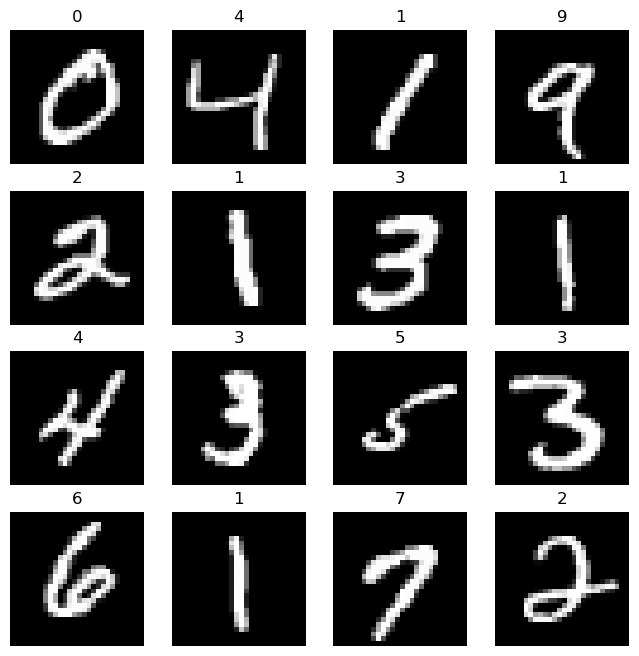

In [99]:
import matplotlib.pyplot as plt
# Visualize some images of the MNIST dataset
# Size of training data
print(train_data.data.shape)

# Size of testing data
print(test_data.data.shape)

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = i
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [44]:
train_data.targets[0].item()

5

## Question 2

### Define a dataloader to construct a batch-wise iterator from your train/test data


In [45]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
trainloader = DataLoader(train_data, BATCH_SIZE, shuffle = True) #TODO
testloader = DataLoader(test_data, BATCH_SIZE, shuffle = True) #TODO

## Question 3

### Design your own Neural Network

In [46]:
import torch.nn as nn
import torch.nn.functional as F
# number of features (len of X cols)
input_dim = 28 * 28

# number of hidden layers
hidden_dim = 256

# number of classes (unique of y)
output_dim = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim) 
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        h_relu = F.relu(self.linear1(x)) 
        y_pred = self.linear2(h_relu) 
        return y_pred

## Question 4

### Train your neural network on the trainloader

In [85]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()
print(mlp.parameters)

# Optimizer
epochs = 2
learning_rate = 1e-6
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = cross_entropy # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = mlp(inputs) 
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs, labels) 
        
        # backward propagation
        loss.backward() 
        
        # One optimization step
        optimizer.step() #refers to Adam optimizer
        losses.append(loss.item())
        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.30393123626709
0 2000 2.231048345565796
0 4000 2.1454038619995117
0 6000 2.1304430961608887
0 8000 2.128164052963257
0 10000 2.019463062286377
0 12000 1.8826464414596558
0 14000 1.9724215269088745
1 0 1.5392733812332153
1 2000 1.6136424541473389
1 4000 1.8663523197174072
1 6000 1.444358229637146
1 8000 1.7603095769882202
1 10000 1.8276299238204956
1 12000 1.5590591430664062
1 14000 1.7035107612609863


## Question 5

### Inspect the optimization procedure through the loss (plot the loss), what do you observe?

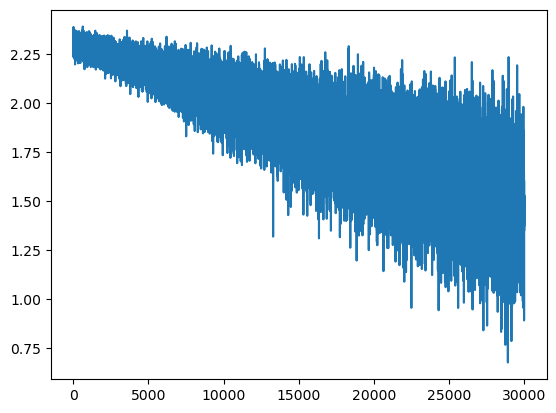

initial loss:  2.3169124126434326 final loss:  1.5282812118530273


In [48]:
x = range(len(losses))
y = losses

plt.plot(x, y)
plt.show()

print("initial loss: ", losses[0], "final loss: ", losses[-1])

Since we are using stochastic gradient descent, the batch will be different each time and therefore the gradient will be different each time. Therefore, the loss will oscillate up and down, forming an "interval". However, we can observe that the general trend is still going down. We can observe that the loss goes from the initial 2.275009870529175 to 1.757567286491394

## Question 6

### Evaluate the quality of your classifier on the test set

In [71]:
size_test = test_data.data.shape[0]

correct = 0

for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    predicted = torch.argmax(outputs, dim = 1)
    correct += (predicted == labels).sum()


final_accuracy =  correct / size_test

print(final_accuracy)

tensor(0.8082)


We achieved a 0.8082 accuracy score

## Question 7 (Bonus)

### Repeat this training with different loss (nll/cross_entropy...) and different number of epochs. What do you observe?

In [105]:
#with cross entropy loss (already includes softmax), epoch = 4, and an additional layer
#epoch means doing one complete pass through the training data

#number of features
inputDim = 28 * 28

#layer 2 dimensions
layer2Dim = 256

#layer 3 dimensions
layer3Dim = 128

#number of classes 
outputDim = 10

class MLP_Trial(nn.Module):
    def __init__(self):
        super(MLP_Trial, self).__init__()
        self.linear1 = nn.Linear(inputDim, layer2Dim)
        self.linear2 = nn.Linear(layer2Dim, layer3Dim)
        self.linear3 = nn.Linear(layer3Dim, outputDim)
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # reshapes [4 (batchsize), 28, 28] to [4, 784]
        h_relu_1 = F.relu(self.linear1(x)) 
        h_relu_2 = F.relu(self.linear2(h_relu_1))
        y_pred = self.linear3(h_relu_2)
        return F.log_softmax(y_pred, dim = 1)      

In [106]:
#train MLP_Trial

mlp = MLP_Trial()
mlp.parameters()

#Optimizer
epochs = 4
learning_rate = 1e-6
optimizer = optim.Adam(mlp.parameters(), lr = learning_rate)

#choice of loss
criterion = nll_loss

losses = []

for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        #set optimizer to zero grad to improve previous epoch gradients
        optimizer.zero_grad()
        
        #Evalute the loss
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        
        #backward pass
        loss.backward()
        
        #One optimizer step
        optimizer.step() #Adam
        losses.append(loss.item())
        
        if not i % 3000:
            print(t, i, loss.item())
        

0 0 2.3146512508392334
0 3000 2.2340924739837646
0 6000 2.307506799697876
0 9000 2.1901981830596924
0 12000 2.124803066253662
1 0 2.0594747066497803
1 3000 1.948743224143982
1 6000 1.9955699443817139
1 9000 1.9564783573150635
1 12000 1.8881559371948242
2 0 1.5541242361068726
2 3000 1.2559893131256104
2 6000 1.5188299417495728
2 9000 1.1911333799362183
2 12000 0.9760828018188477
3 0 0.8150687217712402
3 3000 1.671818494796753
3 6000 1.1124647855758667
3 9000 0.9144277572631836
3 12000 1.2195907831192017


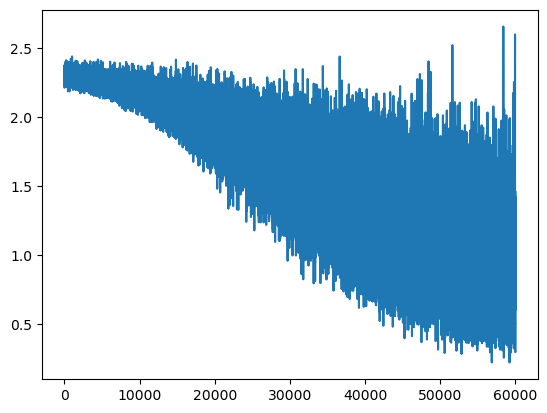

final loss: 0.49695008993148804


In [108]:
x = range(len(losses))
y = losses

plt.plot(x, y)
plt.show()

print("final loss:", losses[-1])

Test the model against the test set

In [109]:
size_test = test_data.data.shape[0]

correct = 0

for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    predicted = torch.argmax(outputs, dim = 1)
    correct += (predicted == labels).sum()
    
final_accuracy = correct / size_test
print(final_accuracy)

tensor(0.8062)


Even though the model has one additional layer and has smaller loss, there is no improvement in its accuracy. This may be better improved through batch normalization or learning rate scheduling